# Chapter 8: Estimation

## The Estimation Game
**Estimation**: the process of inferring the parameters of a distribution from a sample.
  * "Guessing what the distribution is"

**Estimator**: a statistic used to estimate a parameter.
  * "Methods to estimate the distribution"

Estimator Approaches:
  1. Use the **sample mean** (x<sub>mean</sub>== $\bar{x}$) as an estimate of **μ** (distribution's mean (overall data)).
    * Example: If x<sub>mean</sub> of the random sample is 0.155, it's reasonable to guess that **μ** = 0.155.
  2. Identify & discard **outliers**, then compute the **sample mean**.
    * Estimate of *only* the **sample mean** may be inaccurate if **outliers** are present due to an errorneous survey (wrong decimal place).
  3. Use the **median** as an estimator.

Which estimator is best depends on the circumstances (for example, whether there are outliers) and on what the goal is. Are you trying to minimize errors or maximize your chance of getting the right answer?

**General Rule of Thumbs**
 * Using **sample mean** to estimate the *mean* works a little better than using the *median*. In the long run, it minimizes **RMSE**.
 * Using the **median** to estimate is more robust in the *presence of **outliers** or **large errors**.


### Mean Squared Error (MSE)
**Mean Squared Error (MSE)**: a measure of estimation error
  * **sample mean** ($\bar{x}$) minimizes the MSE, *if there are no outliers*.

If we play the "estimation game" many times & each time, compute the error ($\bar{x}$ - μ), the sample mean minimizes
`MSE = (1/m)` Σ ($\bar{x}$ - μ)<sup>2</sup>
  * `m`: number of times you play the "estimation game"
  * `n`: size of the sample used to compute sample mean
  
#### Root Mean Squared Error (RMSE)
**Root Mean Squared Error (RMSE)**: the square root of MSE
  * a more meaningful representation of typical error magnitude
  * one of several ways to summarize the **average error of an estimation process**  
  
#### `RMSE` function
Parameters:
  * `estimates`: list of estimates
  * `actual`: actual value being estimated
    * we don't know `actual` (if we did, we wouldn't need to estimate it)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers (estimates)
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

#### `Estimate1` function
The function simulating the "estimation game" or experiments where we try to estimate the mean of a population based on a sample with size `n`=7. We run `iters`=1000 experiments and collect the mean & median of each sample.

`n` is the size of the sample & `m` is the number of times we play the game.

`means` is the list of estimates based on x<sub>mean</sub>.  
`medians` is the list of medians.

In [3]:
import random

def Estimate1(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

In [4]:
Estimate1()

Experiment 1
('rmse xbar', 0.38283245975325064)
('rmse median', 0.45587137986848314)


**Results**:  
RMSE<sub>sample mean</sub> = 0.37  
RMSE<sub>median</sub> = 0.451

**Conclusions**:
  * If we use the **sample mean** to estimate the mean of the distribution (based on a sample with `n`=7), we'd expect to be off by 0.37 on average (RMSE<sub>sample mean</sub>).
  * Using the **median** to estimate the mean yields RMSE of 0.45, confirming that the **sample mean** yields a lower **RMSE** (at least for this example).

### Shortcomings of Minimizing MSE
Minimizing **MSE** is a nice property, but it's not always the best strategy.  

Examples:
1. Estimating the Distribution of Wind Speeds at a Building Site.
  * If the estimate is *too high*, we might overbuild the structure & increase costs.
  * If the estimate is *too low*, building might collapse.
  * Reason: cost as a function of error is **not symmetric**
2. Roll 3 six-sided dice & predict the total.
  * The value that minimizes MSE is 10.5. This is a bad guess as the total of 3 dice is *never* 10.5.
  * For this case, you'd want an estimator tha thas the highest chance of being right (**Maximum Likelihood Estimator (MLE)**)
  
**Maximum Likelihood Estimator** (MLE): an estimator that computes the *point estimate* most likely to be correct

## Guess the Variance (σ<sup>2</sup>)
Estimating the **variance** of a distribution.

### Estimators
**Bias** (of an estimator): the tendency of an estimator to be *above or below* the actual value of the parameter, when averaged over repeated experiments
  * average error doesn't converge to 0 in the long run

**Unbias**: An estimator is unbiased if the expected total (or mean) error (*after many iterations of the estimation game*) is 0.

Estimator Approaches:
1. Use the **sample variance** (`S`<sup>2</sup>)
  * An adequate estimator for large samples
  * *Shortcoming*: tends to be too low for *small samples* (**biased estimator**)  
    
  `S`<sup>2</sup> = (1/`n`) Σ (*x*<sub>i</sub> - $\bar{x}$)<sup>2</sup>  
  
2. `S`<sup>2</sup><sub>n-1</sub> = `(1/(n-1)` Σ (*x*<sub>i</sub> - $\bar{x}$)<sup>1</sup>
  * **unbiased estimator** of σ<sup>2</sup>
  * Issues: names & symbol are used inconsistently
     * "sample variance" can refer to either `S`<sup>2</sup> or `S`<sup>2</sup><sub>n-1</sub>
     * symbol `S`<sup>2</sup> used for either or both

### `MeanError` function
`MeanError` computes the **mean error** for a collection of estimates. In other words, it computes the **mean difference** between the *estimates* & *actual value*.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

### `Estimate2` function
The function simulates experiments where we try to *estimate the variance of a population* based on a sample with size `n`=7. We run `iters`=1000 experiments & 2 estimates for each sample: `S`<sup>2</sup> and `S`<sup>2</sup><sub>n-1</sub>

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1) # ddof = delta degrees of freedom
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

('mean error biased', -0.15568372749359582)
('mean error unbiased', -0.014964348742528482)


**Conclusions**
  * The **mean error** for `S`<sup>2</sup> is *non-zero* (`S`<sup>2</sup>=-0.13), *which suggests that it is biased*.

  * The **mean error** for `S`<sup>2</sup><sub>n-1</sub> is *close to 0* and gets even smaller if we increase `iters`. (`S`<sup>2</sup><sub>n-1</sub>=0.015)
    * As `m` increases, we expect the **mean error** to approach 0.
  

Properties like **MSE** & **bias** are long-term expectations based on *many iterations* of the estimation game. By running simulations like the ones in this chapter, we can compare estimators & check whether they have desired properties.

But when you apply an estimator to *real data*, you just get 1 estimate. It would not be meaningful to say that the estimate is **unbiased**. Being **unbiased** is a property of the estimator, not the estimate.

Steps:
  1. Choose an **estimator** with appropriate properties
  2. Use the estimator to **generate an estimate**
  3. Characterize the uncertainty of the uncertainty.

In [9]:
def find_nearest(seq, value):
    idx = (np.abs(np.array(seq)-value)).argmin()
    return idx


def cdf_percentile(perc):
    """Returns the value that corresponds to percentile.

    Args:
        perc: number in the range [0, 100]

    Returns:
        number value
    """
    wgt = []
    for prob in p:
        wgt += [perc / 100.0]
    return wgt

## Sampling Distributions
**Sampling Distribution** (of estimator): the distribution of a statistic if an experiment is repeated many times
  * shows how much the estimates would vary if we ran the experiment over & over.

#### Scenario
Want to know the average weight of the adult female gorillas, but it's harmful to gorillas to weigh them. Fortunately, it's acceptable to weigh a *sample* of 9 gorillas. Assumming the population of the preserve is well known, so we can choose a *representative sample* of adult females.

We could use the **sample mean**($\bar{x}$) to *estimate the unknown **population mean** (μ)*.

Having weighed 9 female gorillas, you might find that $\bar{x}$ = 90 kg & **sample standard deviation** (`S`) is 7.5 kg. 

The sample mean is an **unbiased estimator** of **μ** & in the long run, it *minimizes **MSE***. Thus, reporting a single estimate that summarizes the results would be 90 kg.

**Problem**
How confident can you be in the estimate. If you only weigh `n`=9 gorillas out of a much larger population, you might be unlucky & choose the 9 heaviest gorillas *just by chance*. (sampling error)

### Sampling Error
**Sampling Error**: 
  * error in an estimate due to the limited size of the sample & variation due to chance
  * variation in the estimate caused by random selection
 
To quantify sampling error, we can simulate the sampling process with *hypothetical values* of μ and σ, and see how much $\bar{x}$ varies.

Since we don't know the *actual* values of μ & σ in the population, we'll use the *estimates* $\bar{x}$ & `S`.

**Question**:
"If the actual values of μ & σ were 90 kg & 7.5 kg, and we ran the same experiment many times, how much would the estimated mean ($\bar{x}$) vary?

### `SimulateSample` function
`SimulateSample` simulates experiments where we estimate the mean of a population using $\bar{x}$ and returns a list of the estimates (one from each experiment).

Parameters:
  * `mu` & `sigma` are *hypothetical* values of the parameters.
  * `n` is the sample size (number of gorillas measured)
  * `m` is the number of times we run the simulation
  
Steps (of each iteration):
  1. Choose `n` values from a normal distribution with the given parameters. 
  2. Compute the sample mean ($\bar{x}$).
  3. Run 1000 simulations (`iters`) & then compute the distribution (`cdf`) of the estimates.

In [12]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    means = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    return means

means = SimulateSample()

Here's the "sampling distribution of the mean", which shows how much we should expect $\bar{x}$ to vary from 1 experiment to the next.

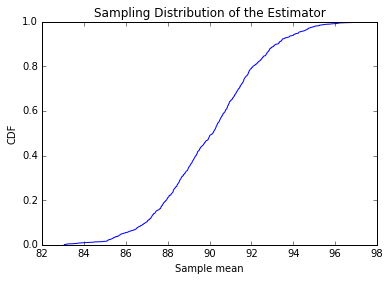

In [30]:
est_cdf = ECDF(means)
plt.plot(est_cdf.x, est_cdf.y)
plt.xlabel('Sample mean')
plt.ylabel('CDF')
plt.title('Sampling Distribution of the Estimator')
plt.show()

The mean of the sample means is pretty close to the actual value of μ. Thus, suggesting that the experiment yields the right answer *on average*.

After 1000 tries, the *lowest* result is 82 kg & *highest* is 98 kg. This range suggests that the *estimate might be off by as much as 8 kg*.

In [27]:
np.mean(means)

90.059990491326715

### Summarizing Sampling Distribution: 2 Common Methods
1. **Standard Error** (SE): a measure of how far we expect the *estimate to be off, on average*.
  * The **RMSE** of an estimate, which quantifies variability due to sampling error (but not other soures of error).
2. **Confidence Interval**: an interval that represents the expected range of an estimator if an experiment is repeated many times. 
  * a range that includes a given fraction of the sampling distribution.
  * `90% Confidence Interval` is th range frmo the **5th** to the **95th** percentile.

##### 90% Confidence Interval
** 90% Confidence Interval**: an interval that contains 90% of the values in the sampling distribution.

For this sampling distribution, the 90% CI is (86, 94) kg.

In [29]:
idx = find_nearest(est_cdf.y, 5/100.0), find_nearest(est_cdf.y, 95/100.0)
ci = est_cdf.x[idx[0]], est_cdf.x[idx[1]]
ci # range of 90% CI

(85.864957617228384, 94.257302029361739)

##### Standard Error
The **RMSE** of the sample means is called the **Standard Error**.

For each simulated experiment, we computed the error ($\bar{x}$ - μ) & then compute the RMSE. 

For this example, the standard error is ~ 2.5 kg.

In [28]:
stderr = RMSE(means, 90)
stderr

2.48993475652211

#### Confusion between Standard Errors & Confidence Intervals
  1. **Standard Error** (SE) is often confused with **standard deviation** (σ).
    * **standard deviation** describes the variability in a *measured quantity*. In this example, σ of gorilla weight is `7.5 kg`.
    * **standard error** describes variability in an *estimate*. In this example, the SE of the mean (based on 9 measurements) is `2.5 kg`.
  2. Misbelief that there's a *90% probability* that the actual parameter (μ) falls in the **90% CI**. *This is NOT true*.

**Main Idea**  
The **sampling distribution** answers a different question. It gives us a sense of * **how reliable an estimate is** by telling us how much it would **vary*** if you ran the experiment again.

**Confidence Intervals** and **Standard Errors** quantify the *variability* in the estimate due to random sampling.
  * Quantify the **sampling error**, error due to measuring only *1 part of the population*.

Sampling distribution does not account for other sources of error (notably *sampling bias* & *measurement error*).

## Sampling Bias
#### Scenario
Research Question: What is the average weight of women in the city you reside?

Sampling Method: It's unlikely that you'd be able to choose a representative sample of women & weigh them. A simple alternative is "telephone sampling," where you choose random numbers from the phone book & call to survey.

Telephone sampling has many *limitations*:
  * sample is limited to people whose telephone numbers are listed, eliminating people without phones (who might be poorer than average) & people with unlisted numbers (who might be richer).
  * sampling during the day may less likely survey people with jobs.
  * sampling the person who answers the phone, makes it less likely to sample people who share a phone line.
  

### Sampling Bias
**Sampling Bias**: error in an estimate due to a sampling process that is not representative of the population
  
Example: If such factors like income, employment, & househouse size are *related* to `weight`(variable being evaluated) - results of the survey are going to be affected by the limitations!  
  
##### self-selection
self-selection is another type of sampling bias. Some people may refuse to answer the questions and if such tendency is related to weight...it affects the results.

### Measurement Error
**Measurement Error**: error in an estimate due to inaccuracy collecting or recording data.

Example: If you *ask* people how much they weigh *as opposed to weighing them*, the results might be inaccurate. Respondents might round up or down or lie about their weight causing *inaccuracies*.

## Exponential Distributions
Estimating an expoential distribution through an estimator `L`.

### Estimator `L`
In general, the **mean** of an exponential distribution is **1/λ**.  
Deriving from this mean, the estimator is: **`L = 1/`$\bar{x}$**
 
 `L` is an estimator of λ. It's not just any estimator, but also the **maximum likelihood estimator**.
   * If you want to maximize your chance of guessing λ exactly, `L` is the best approach.

#### Issues
The **sampling mean** ($\bar{x}$) is known to not be robust in the *presence of outliers*. Thus, `L` will have the same issue.

#### Alternative Solution: Sample Median
The median of an exponential distribution is: **median<sub>exp</sub> = ln(2)/`m`**.

Deriving from this median, the estimator is: **L<sub>m</sub> = ln(2)/m**

### `Estimate3` function
`Estimate3` function simulates experiments trying to estimate the **mean of an exponential distribution** using the *mean* & *median* of a sample.

Simulation of sampling is conducted with `λ = 2`.

In [47]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

('rmse L', 1.092361963918027)
('rmse Lm', 1.7007505005130352)
('mean error L', 0.34427621025586602)
('mean error Lm', 0.46031874902116043)


**Conclusions**
  * The **RMSE** is smaller for the *sample mean* (`L`) than for the *sample median* (`L`<sub>m</sub>).
  * But neither estimator is *unbiased*. Unfortunately, both estimators appear to be *biased*.
    * `L` has a **mean error** = 0.33.
    * `L`<sub>m</sub> has a **mean error** = 0.45.
    * Neither converges to 0 as `m` increases.
    
It turns out that:
  * $\bar{x}$ is an *unbiased* estimator of the **mean of the distribution**.
  * `L` is NOT *unbiased* estimator of λ.